# Baseball Case Study:

Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features:Runs,at Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Run Average(ERA),Shutots,Saves,Complete Games and Errors

Output:Number of predicted wins(W)

# Importing requried Libraries:

In [14]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Importing the dataset:

In [15]:
df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Identifing type of problem:

In [16]:
#Checking the data type of each attribute
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

As per problem statement Target variable i.e. W is int64 i.e. continuous value so we Regression to learn our model.

# Exploratory Data Analysis:

In [17]:
#Checking shape of dataset
df.shape

(30, 17)

There are 30 rows and 17 columns in my dataset.

In [18]:
#Checking the data types of all columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

ERA is a float type data and except ERA all columns are int type data.

In [19]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


So,I can there is a(1)float64 vallue and (16)int value and there are no null values.

In [20]:
#Checking unique values of each columns
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

So, I can see these are number of unique values in each column.

In [21]:
#Checking null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values are present in the given dataset.

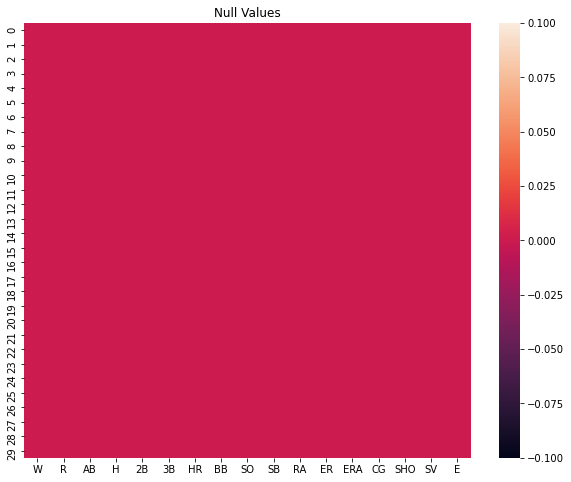

In [22]:
#Checking for null values in heat map
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

I can see in graph that there is no null values in the given dataset.

In [23]:
#Checking value counts of target column
df['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

I can see there are no missing values or spaaces in the target column.

In [24]:
#Checking description of dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low values in it, where few have very low values in it, where few have very high values in the datset.

# Data Visualization:

# Univariate Analysis:

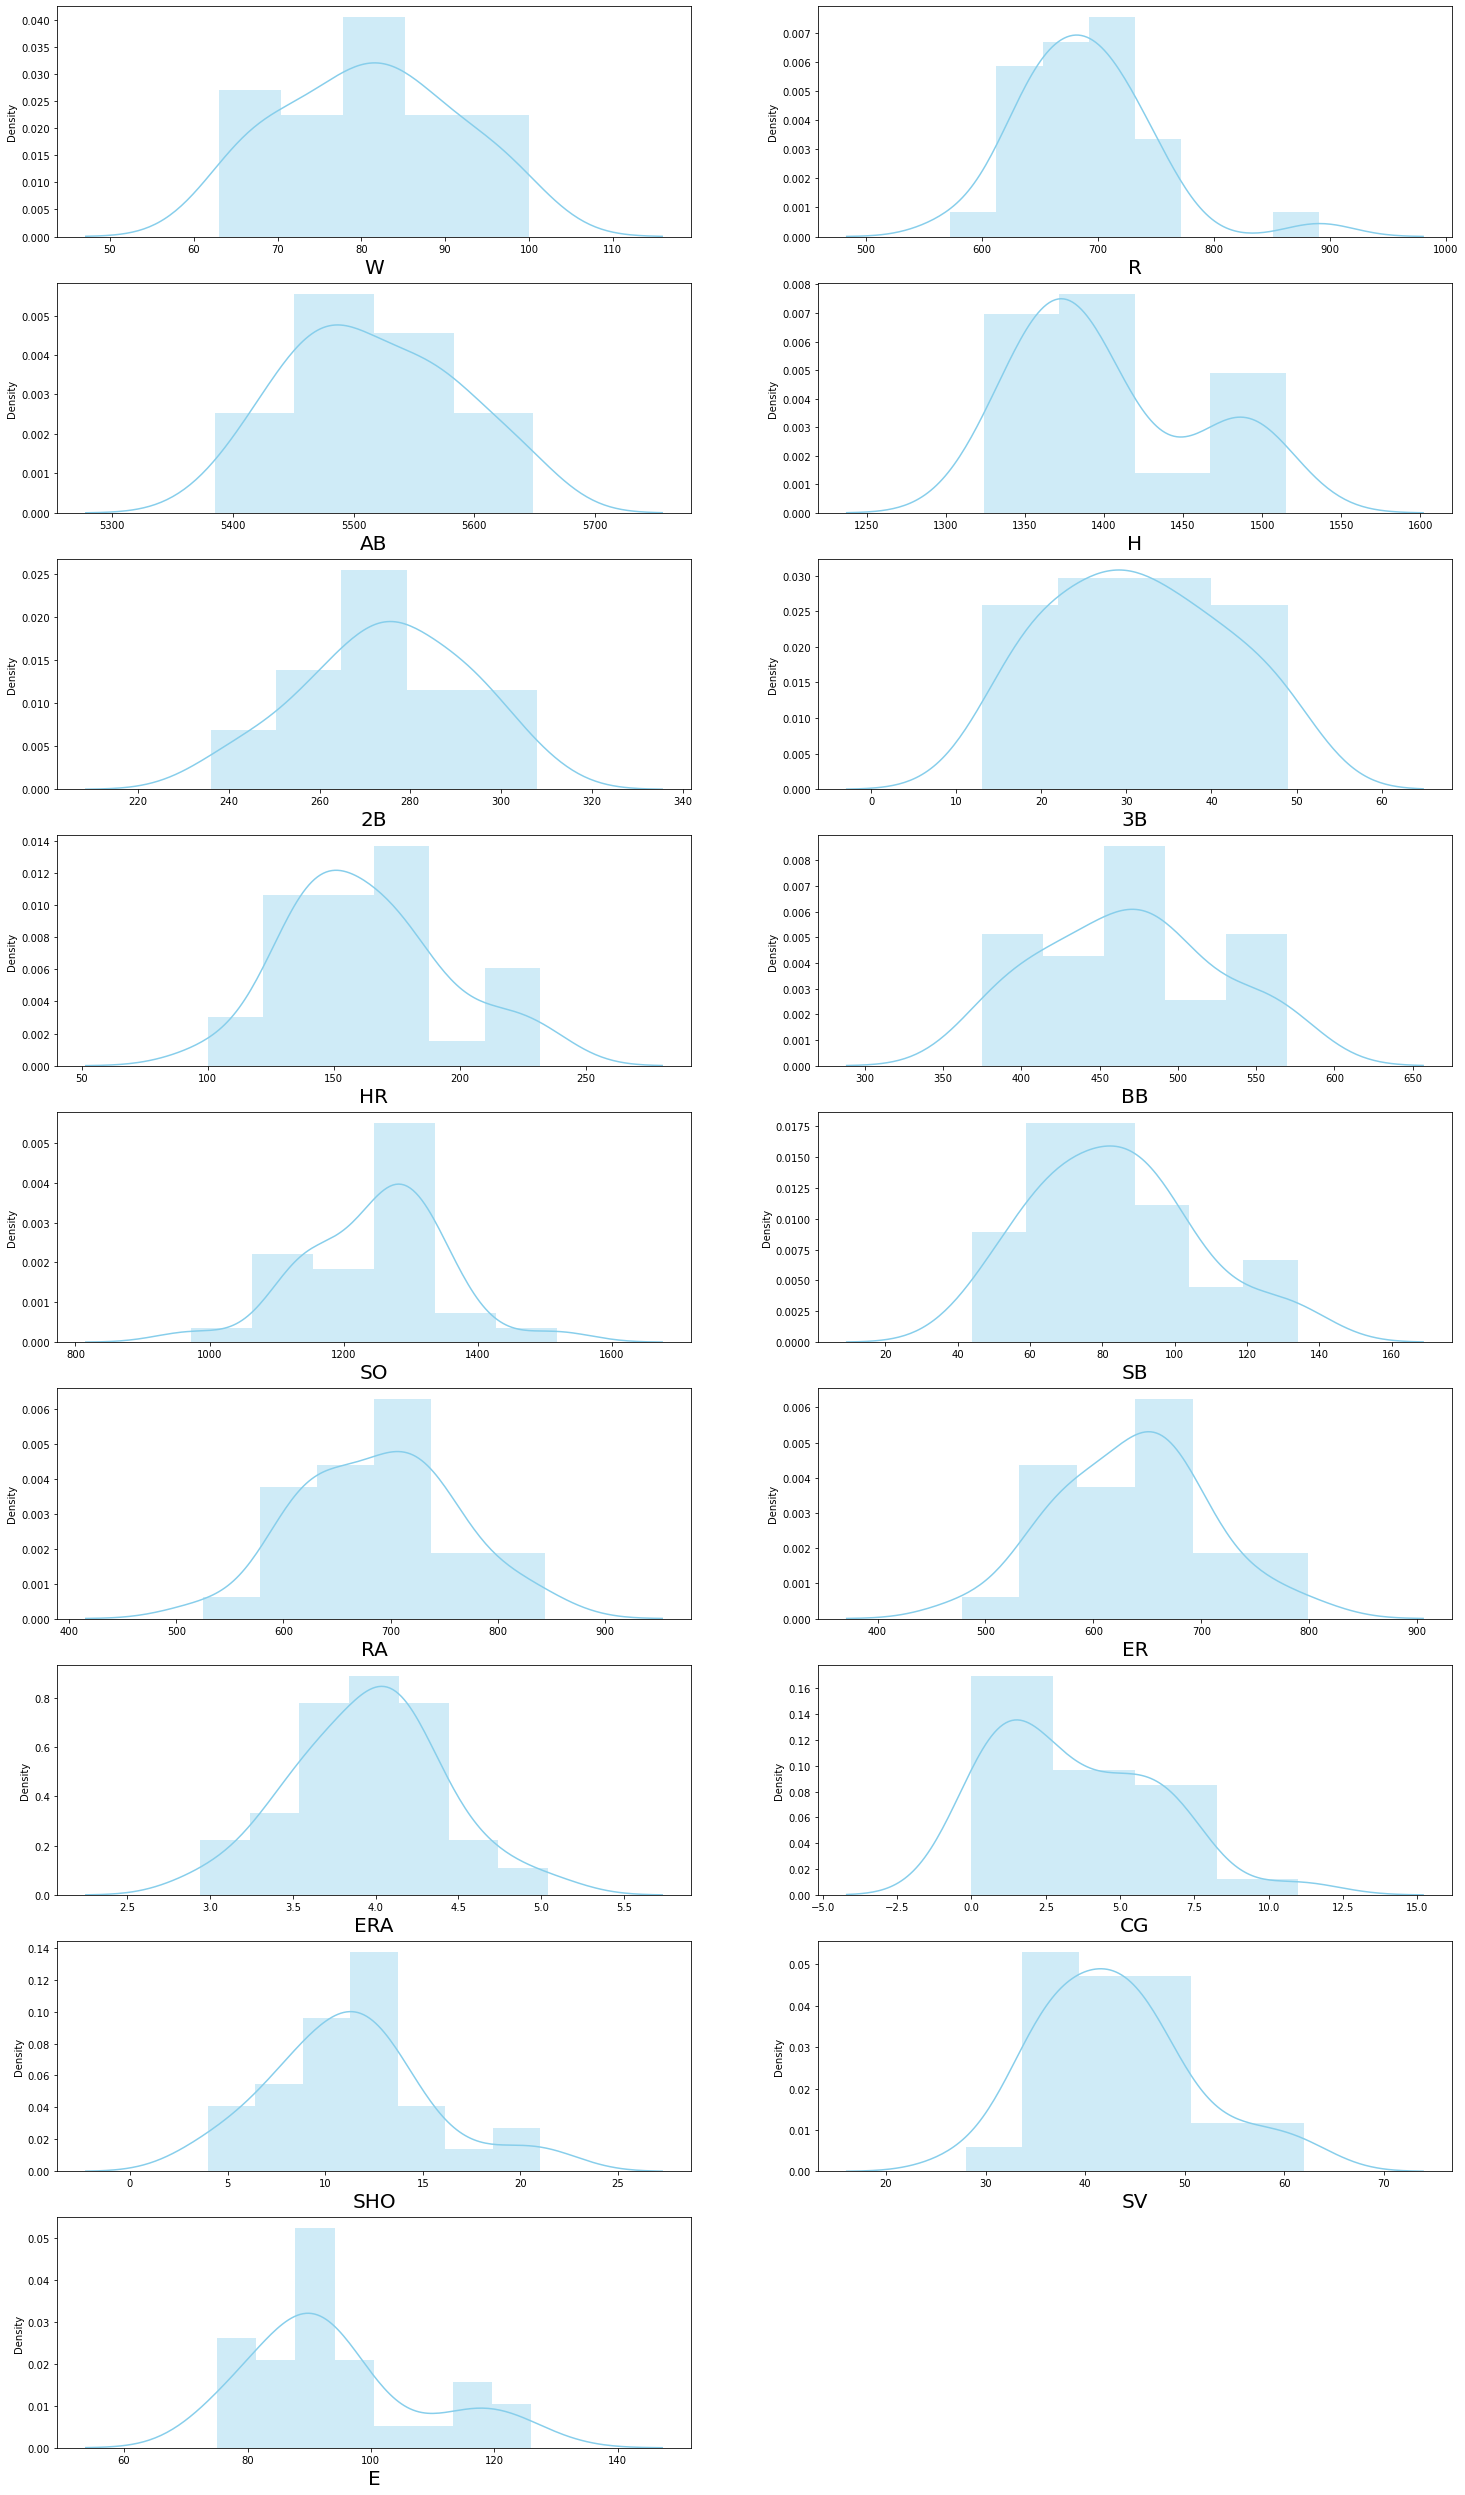

In [25]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Almost all the columns are normally distributed.Except R,SO,CG and E.

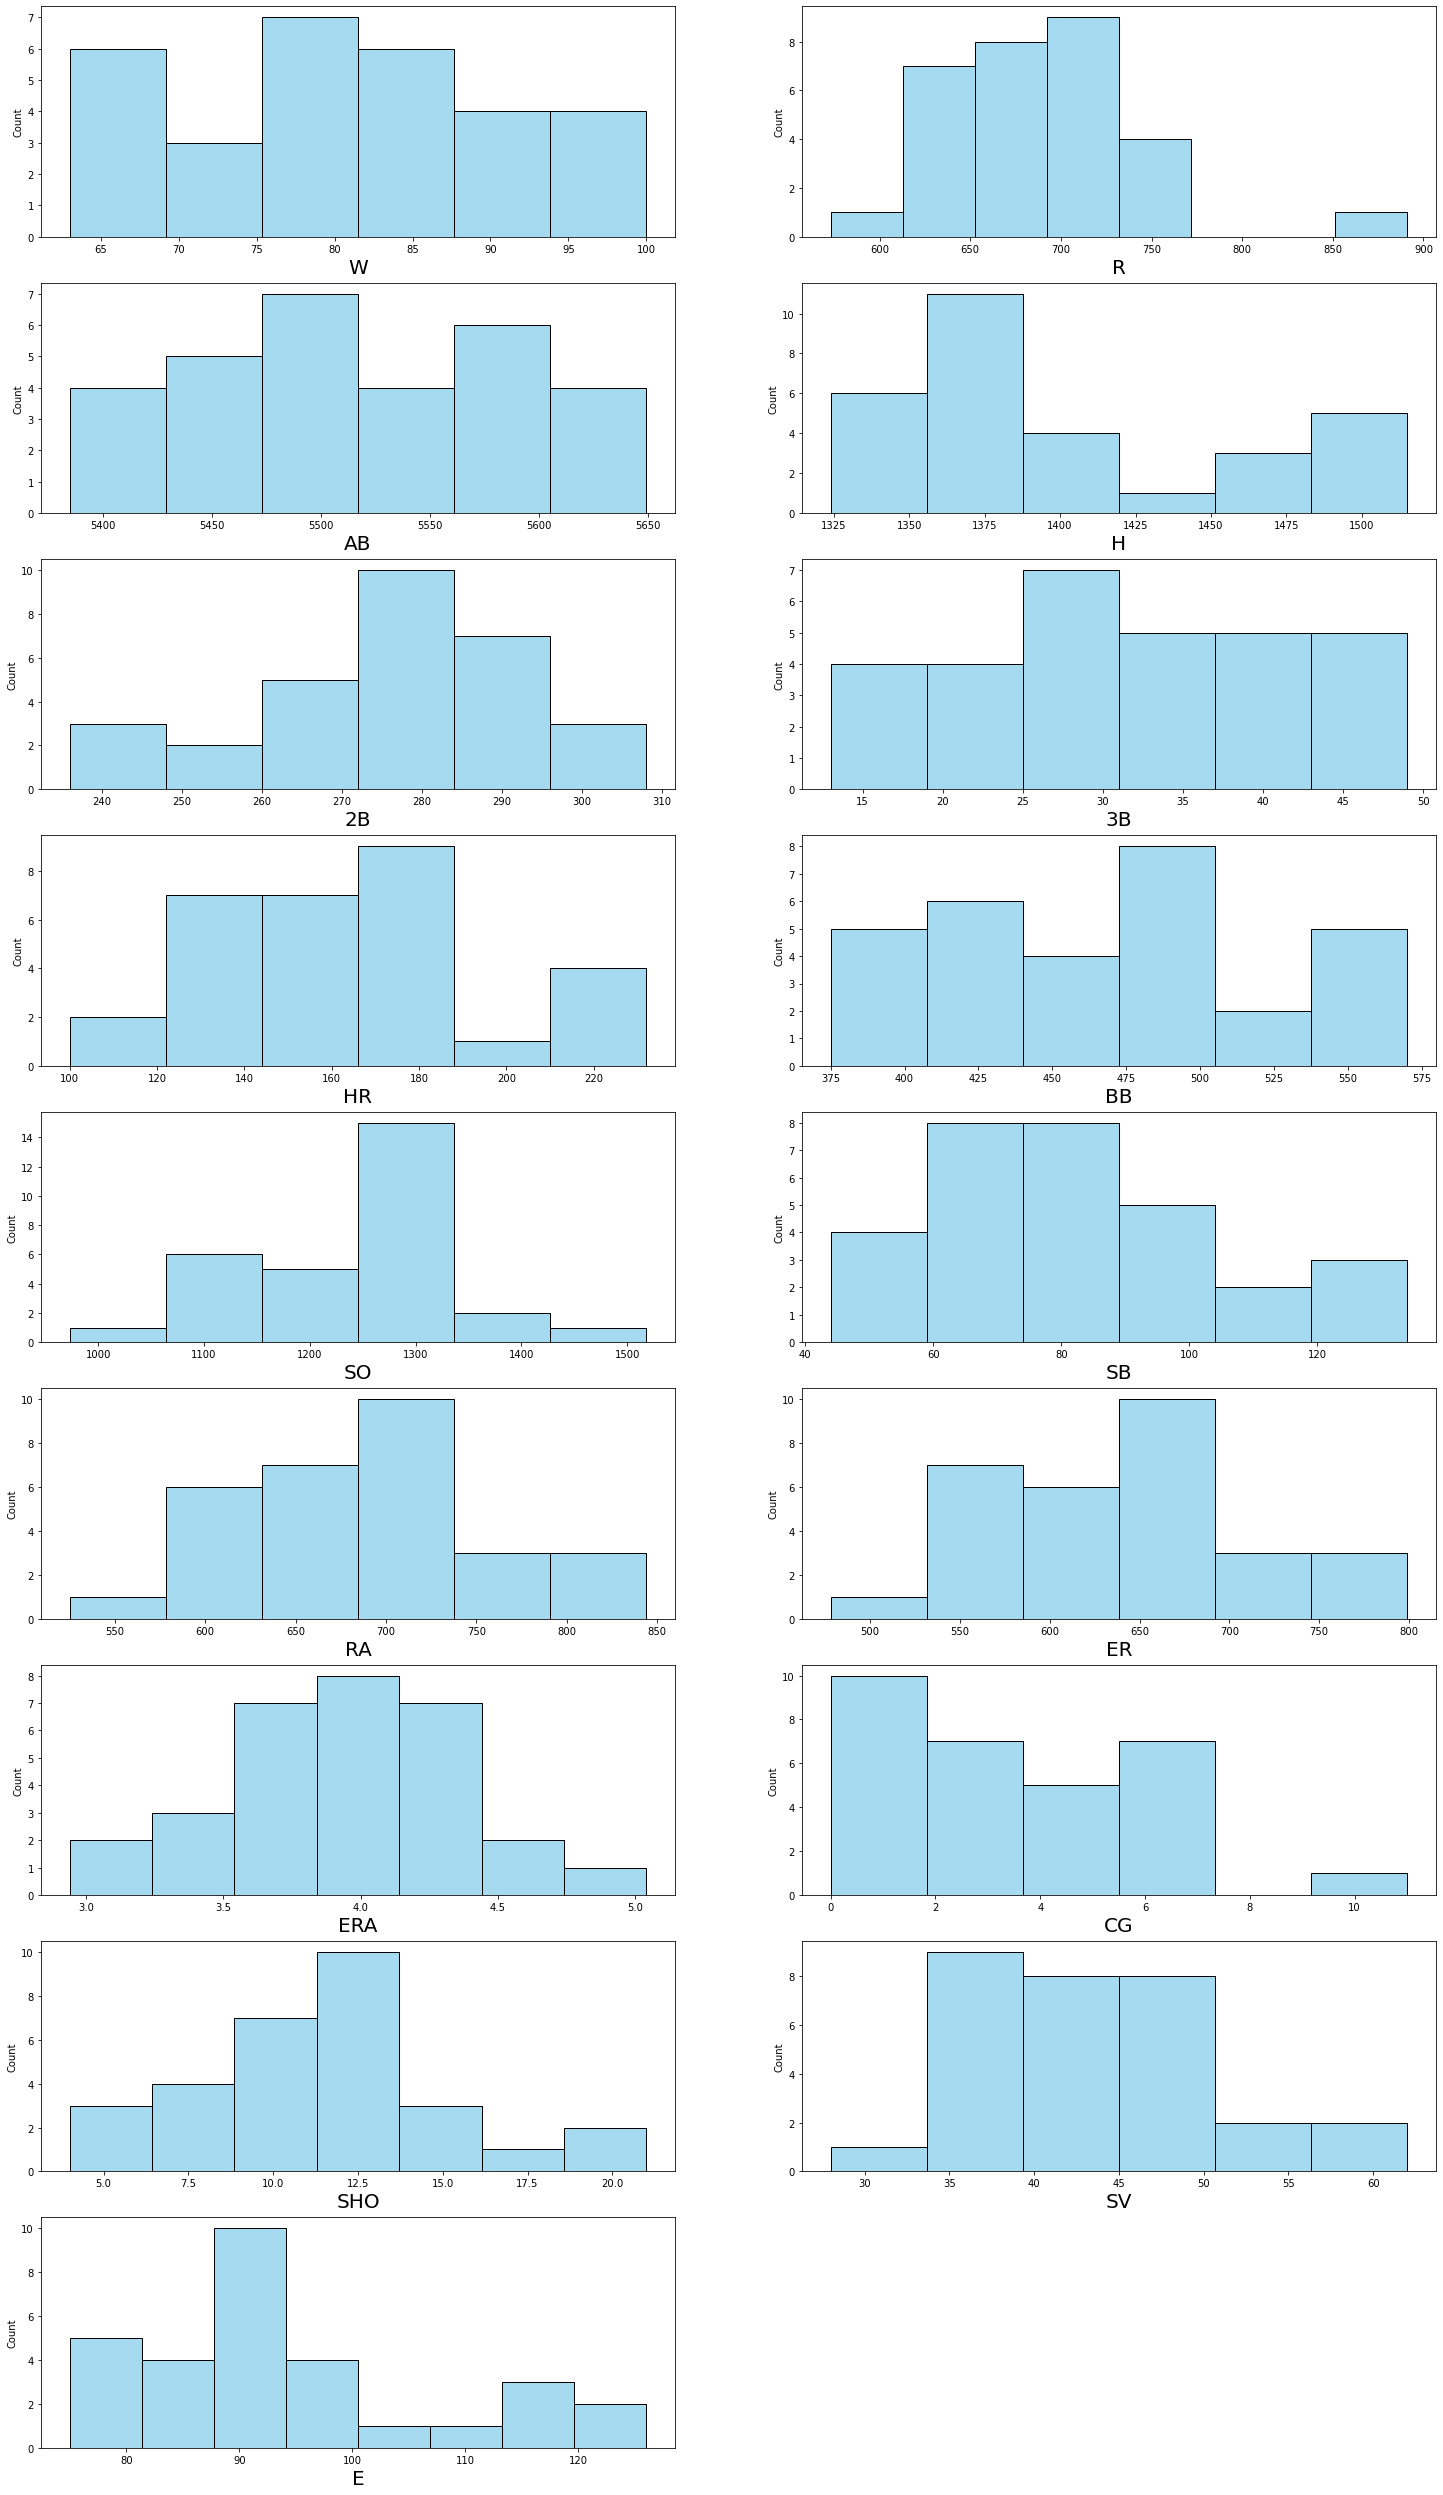

In [26]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

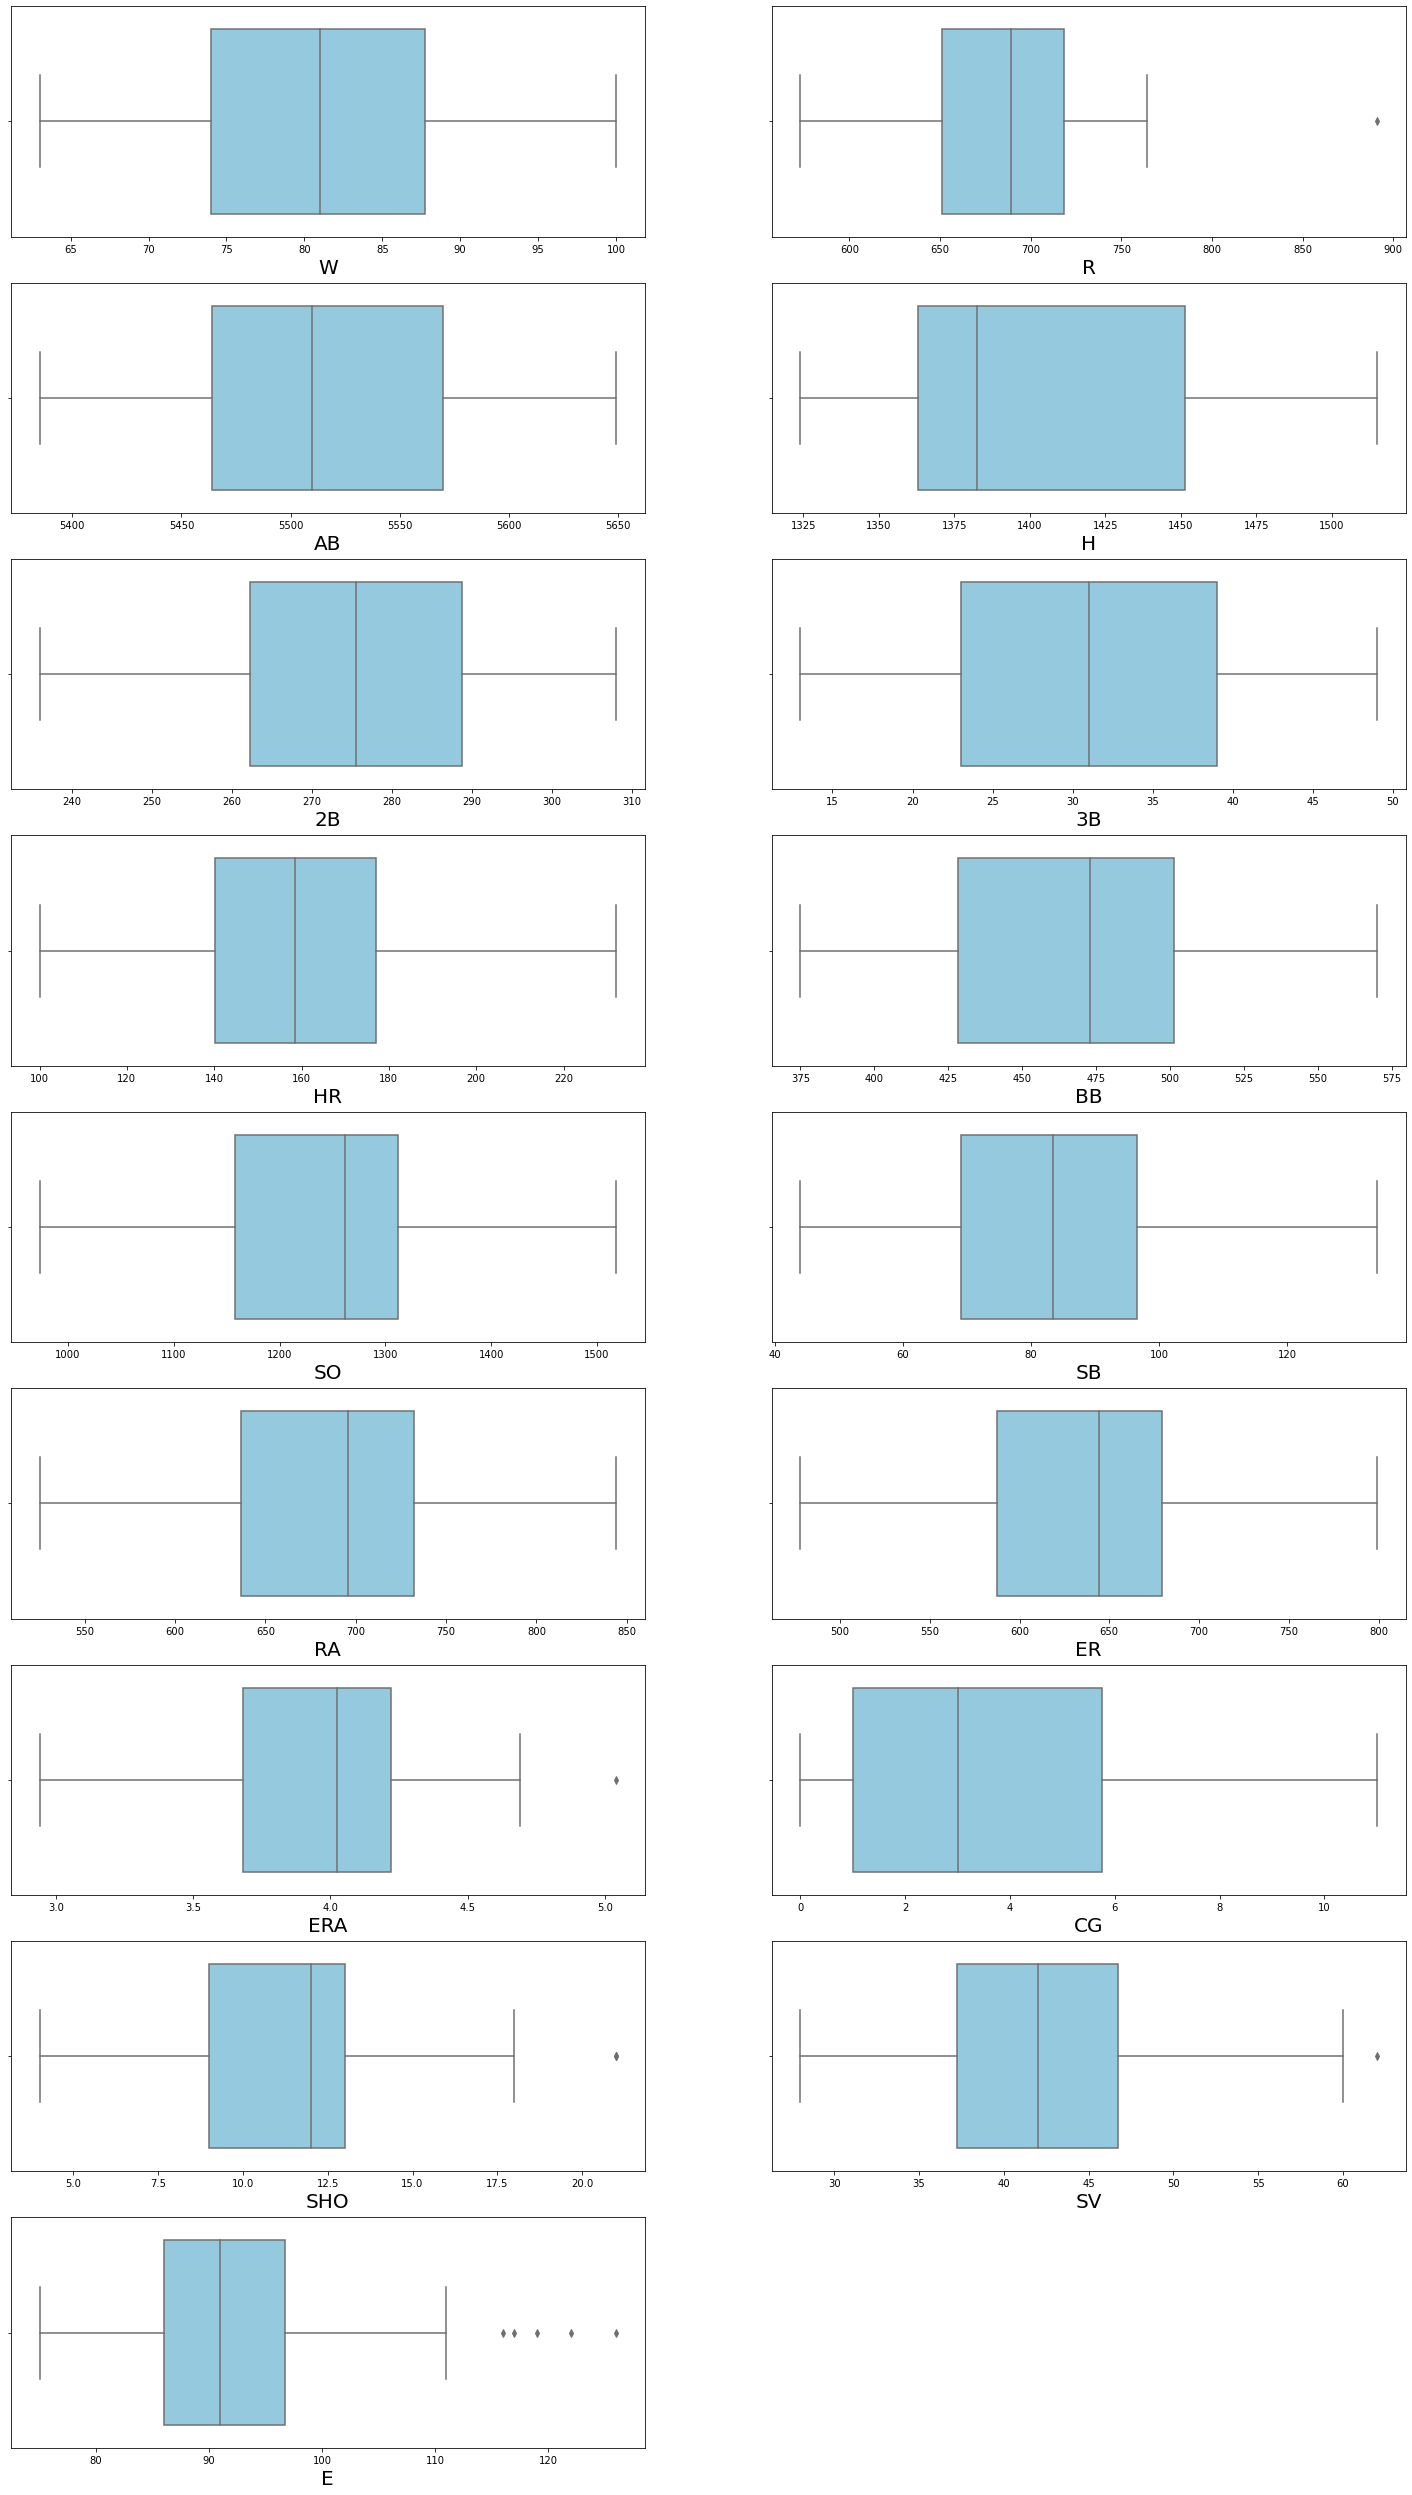

In [27]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

As shown in boxplot R,ERA,SHO,SV and E input variable is having outliers in it. So,we need remove outliers from that the input variables.

# Bivariate Analysis:

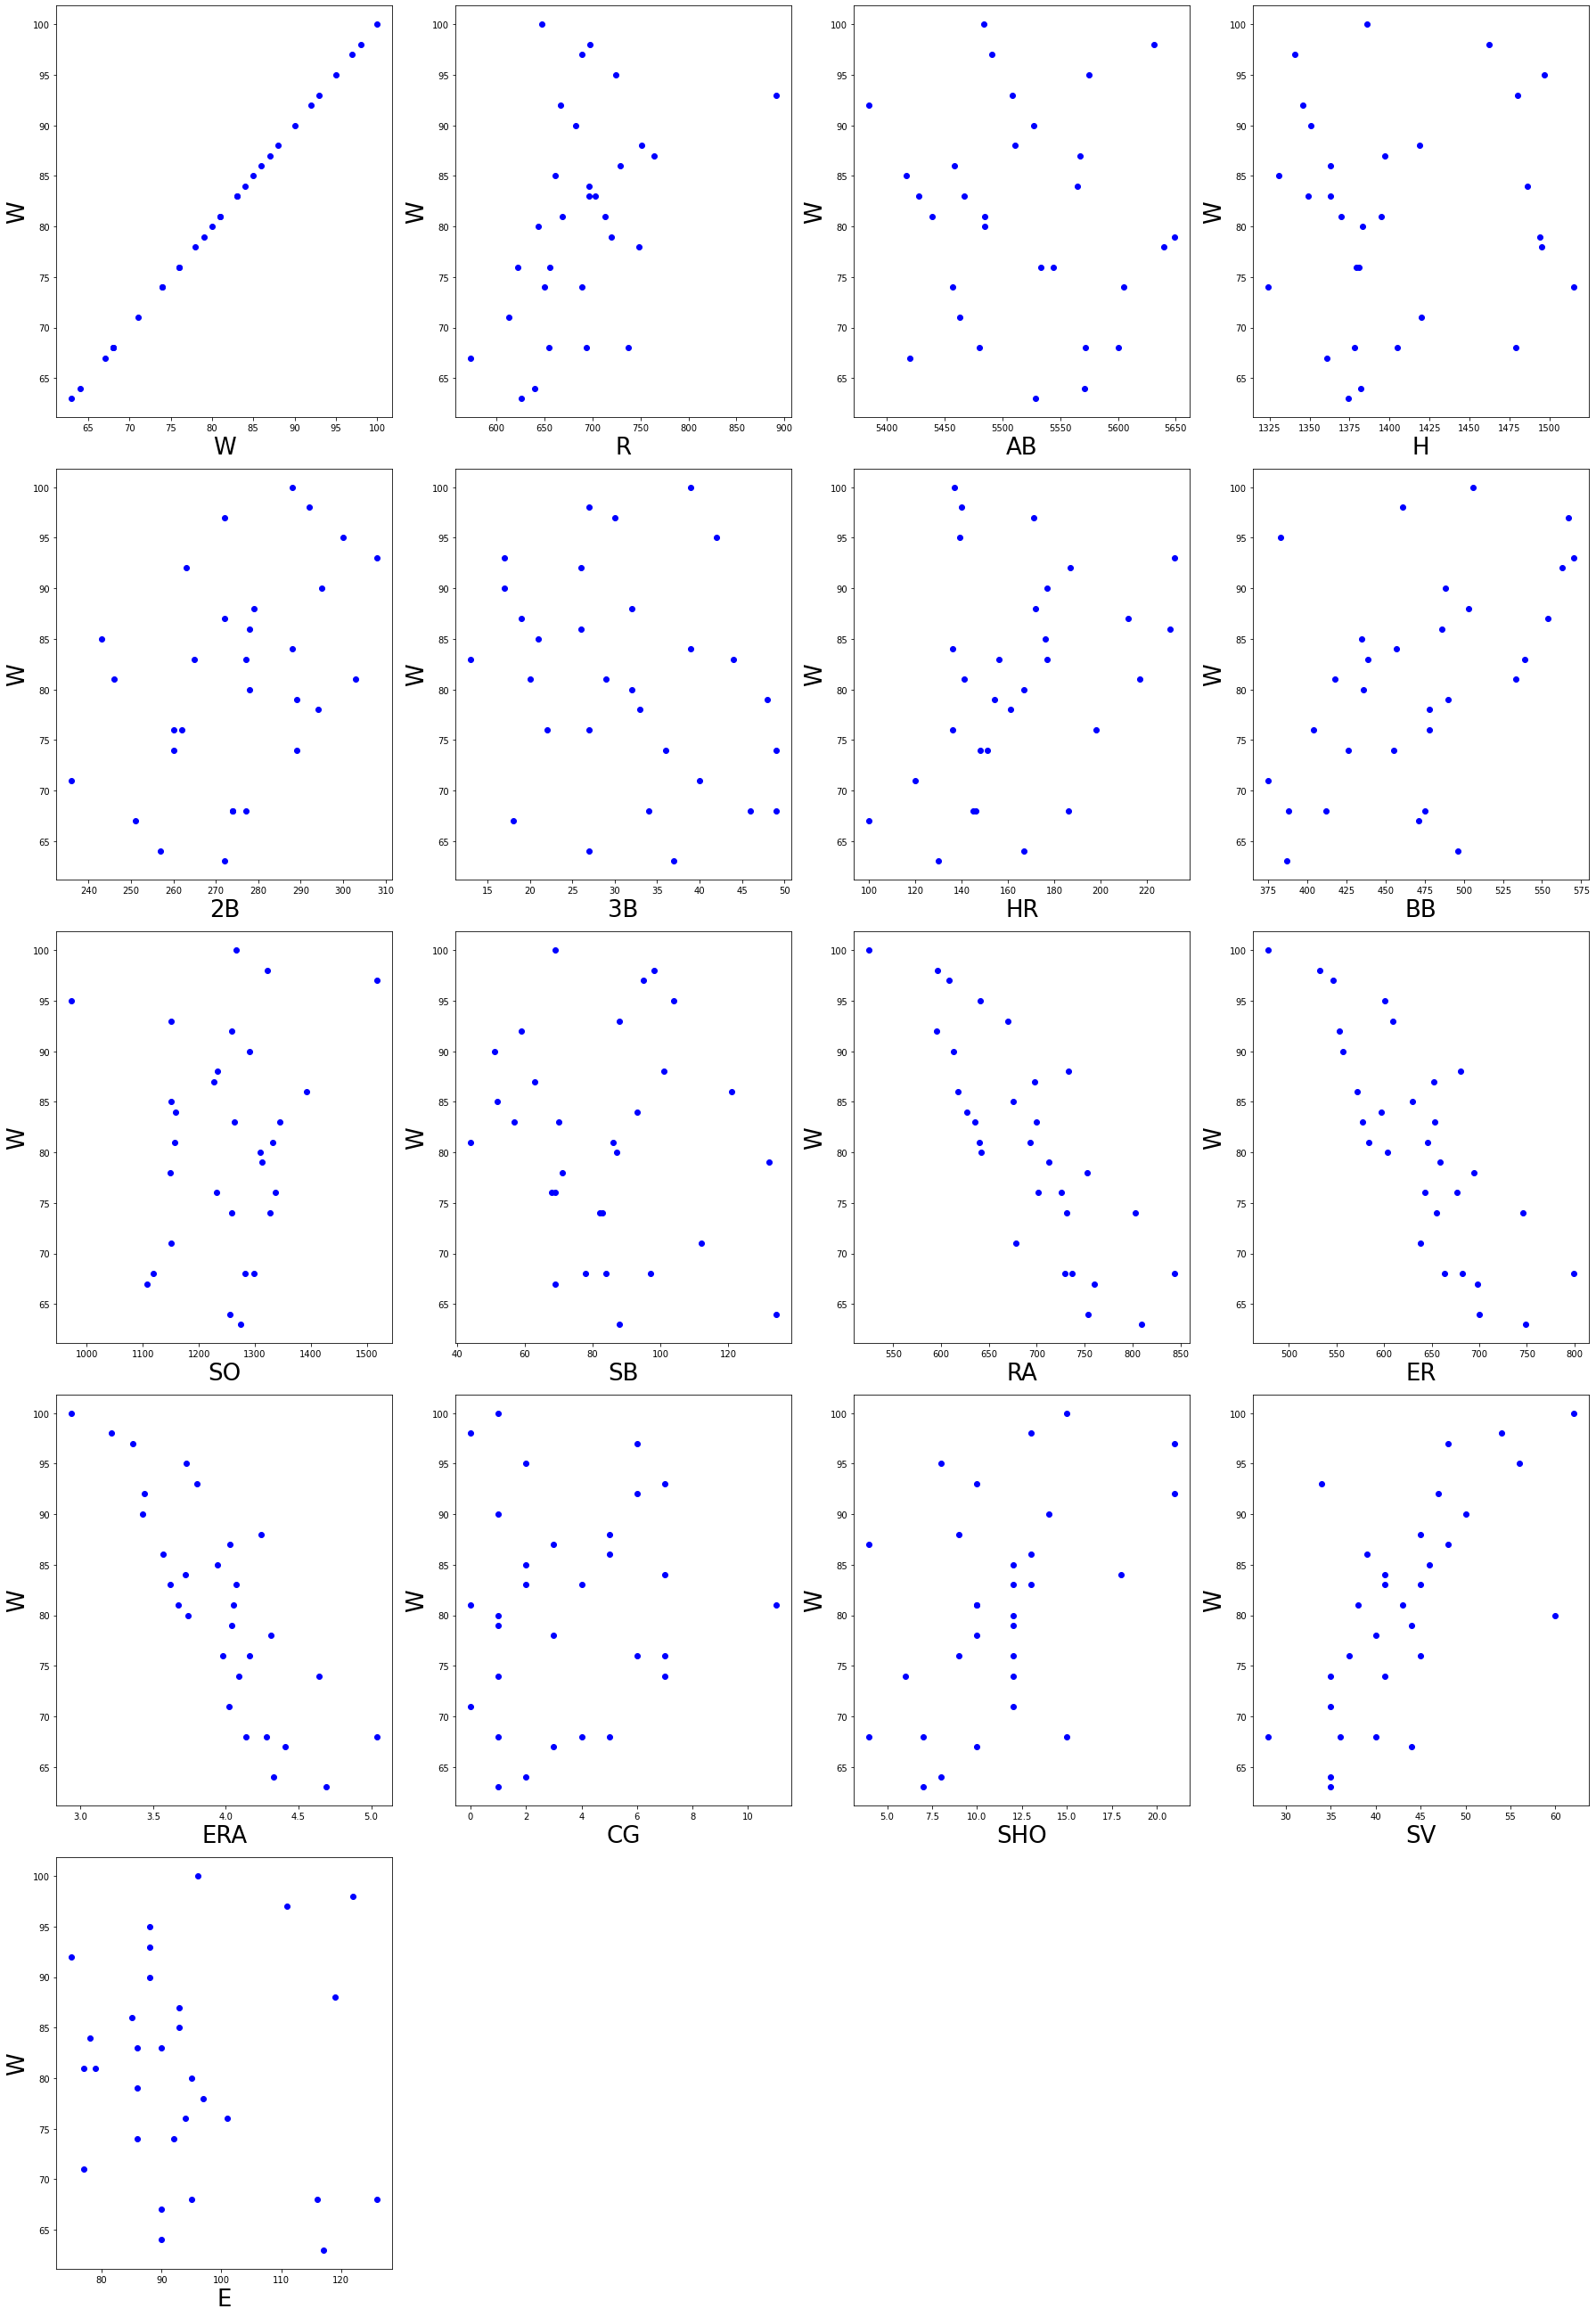

In [28]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()
    

As, we can see in plot SV,ERA,SHO and R is having almost linear relationship with target variable and other variables are having non linear relation ship with target variable.

<Figure size 1800x1440 with 0 Axes>

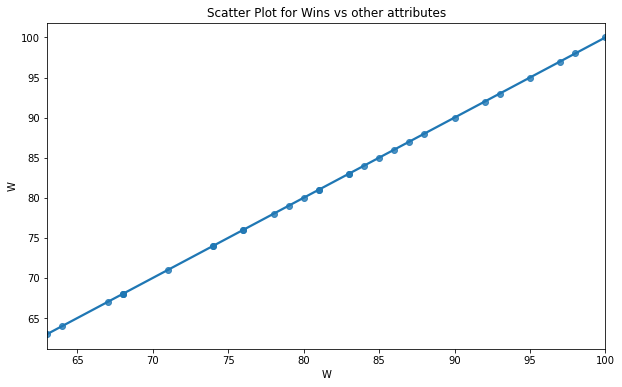

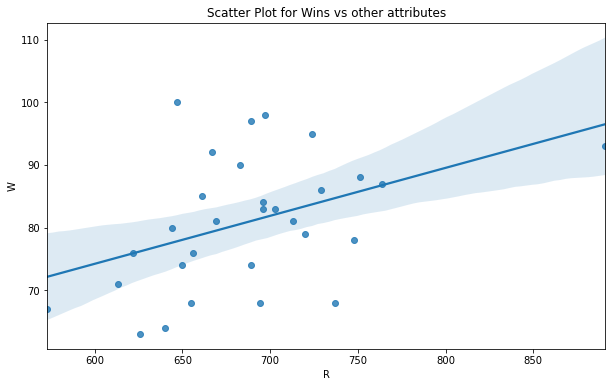

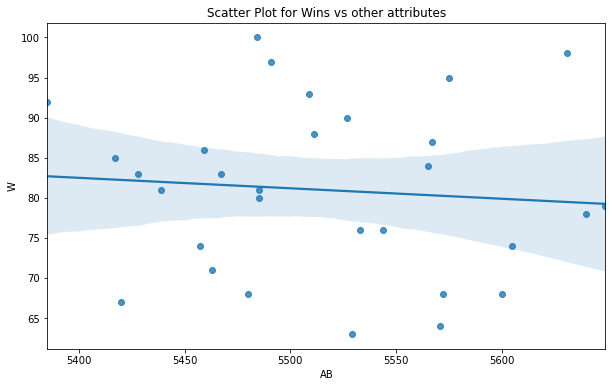

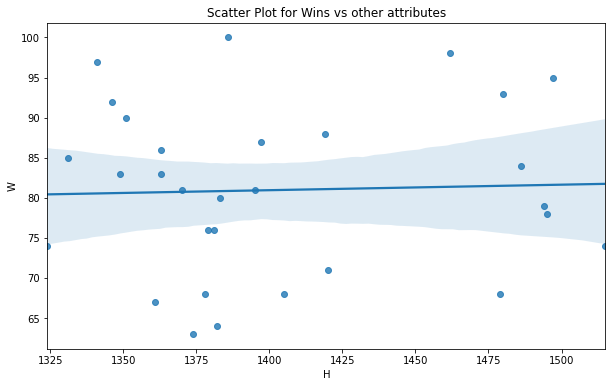

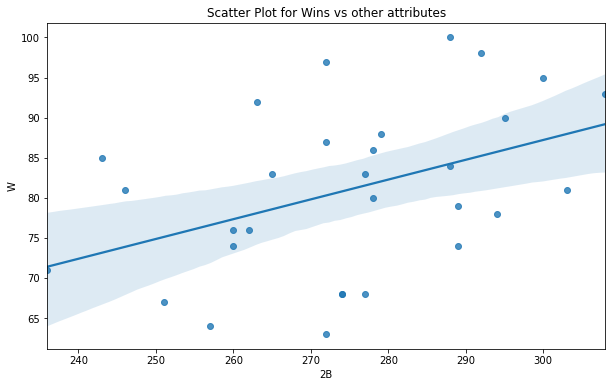

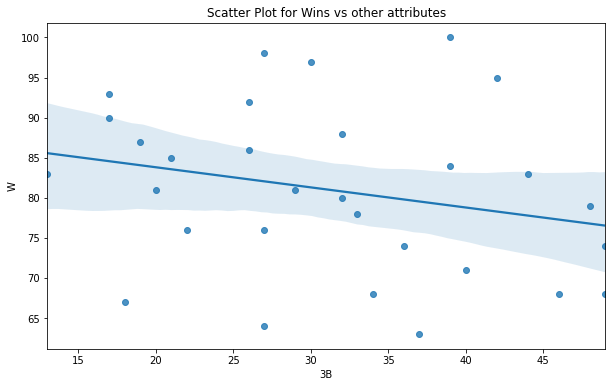

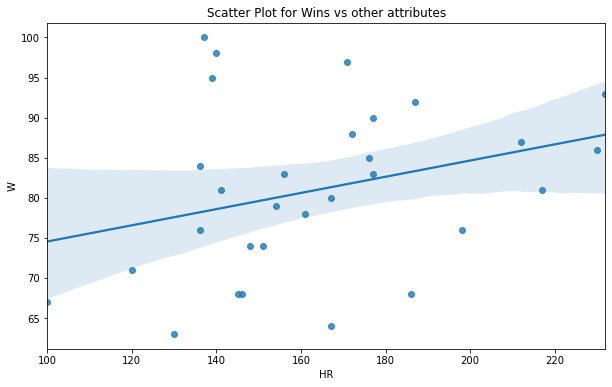

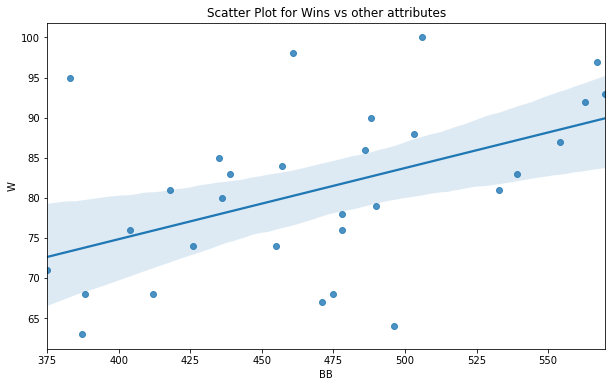

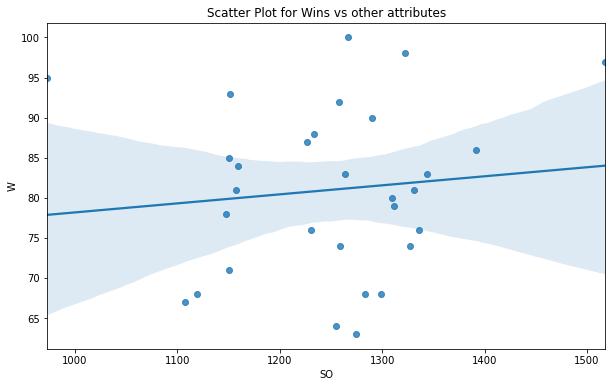

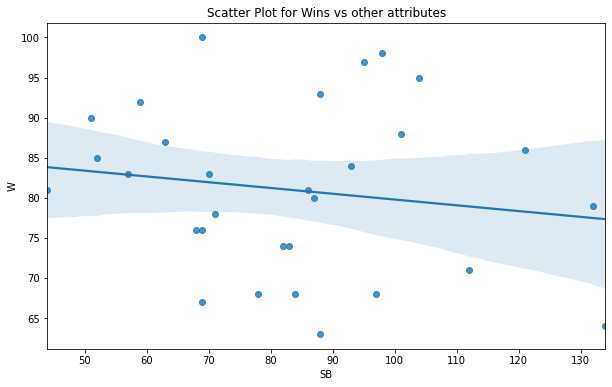

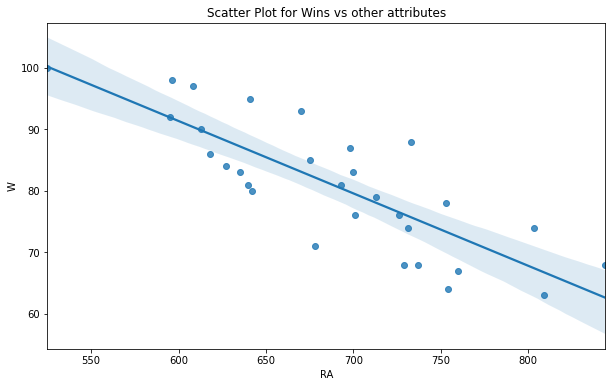

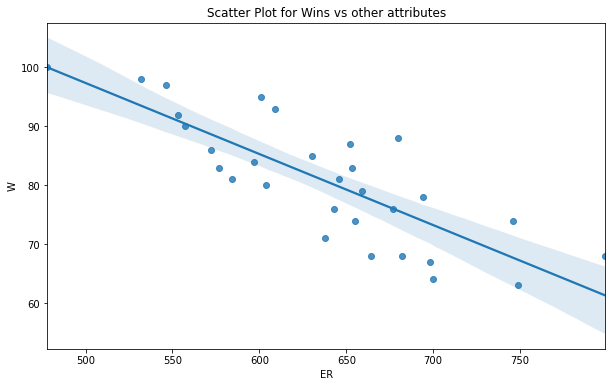

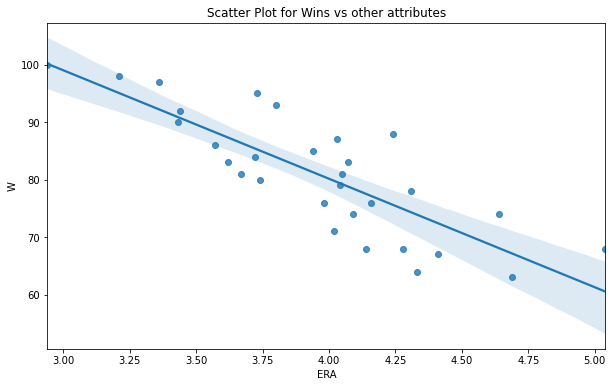

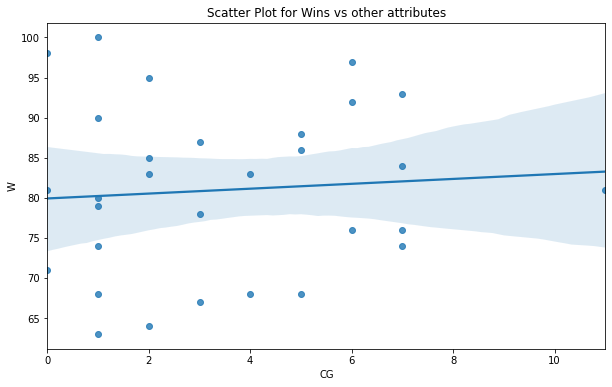

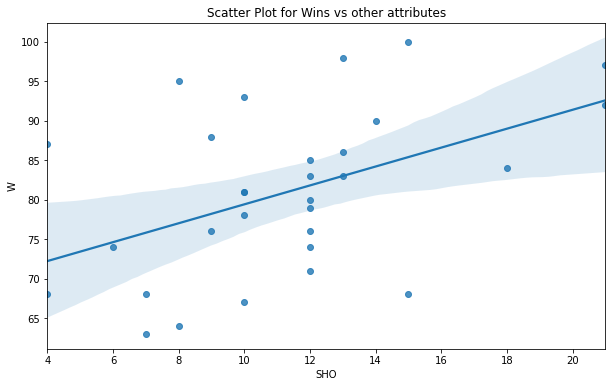

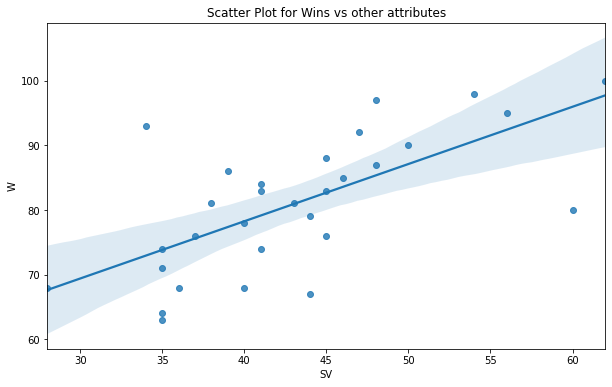

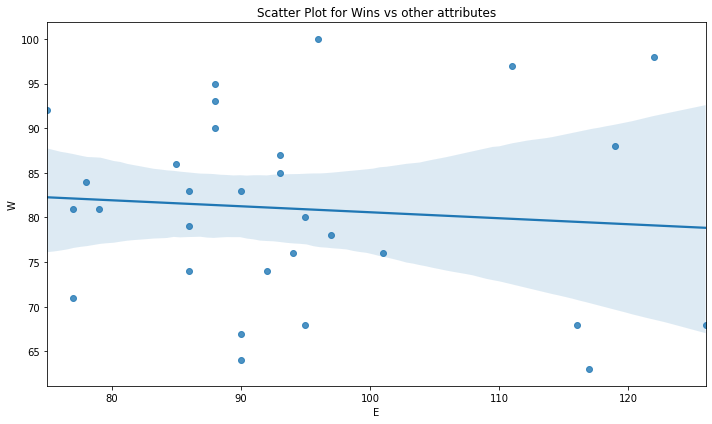

In [29]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

RA,ER,ERA have good relation with Win. Reset all the Columns does not good Relation with Win because data is scatter across all the places.

# Multivariate Analysis:

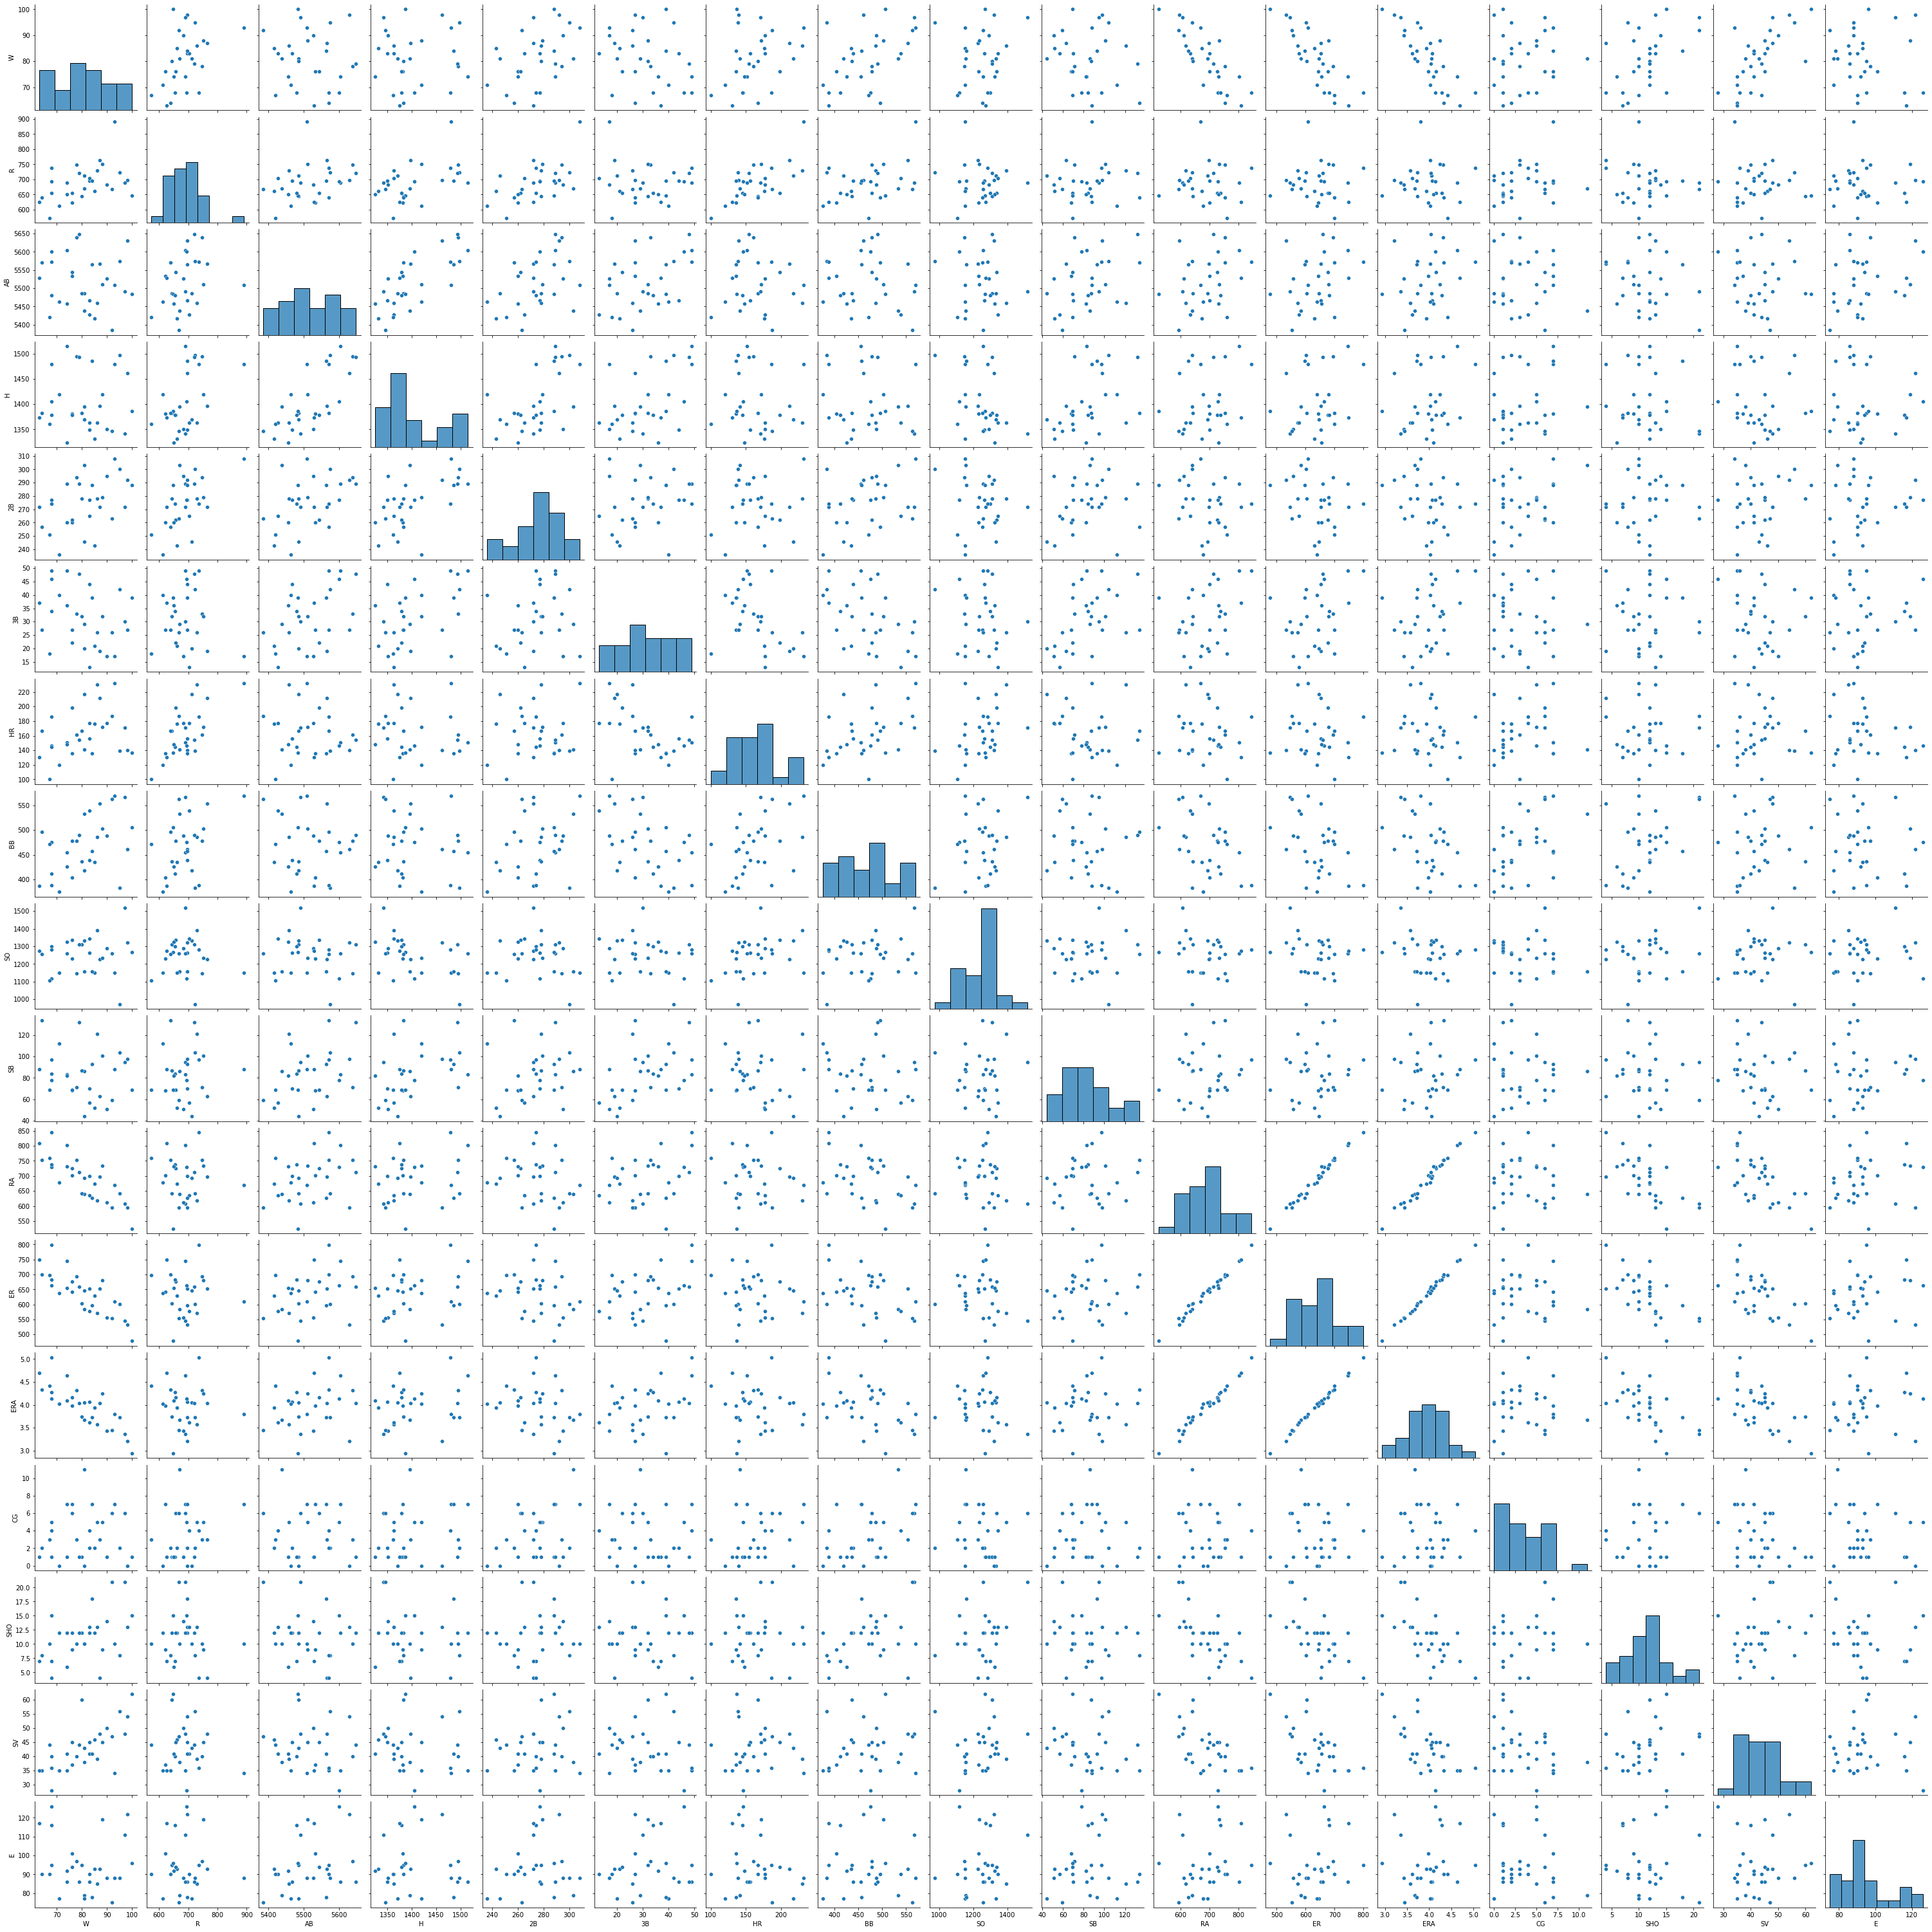

In [30]:
sns.pairplot(df)
plt.show()

Above the pair plots of each pair of features. I can observe whether they are making good correlation or if they are just scattered with out any pattern.

# Heatmap:

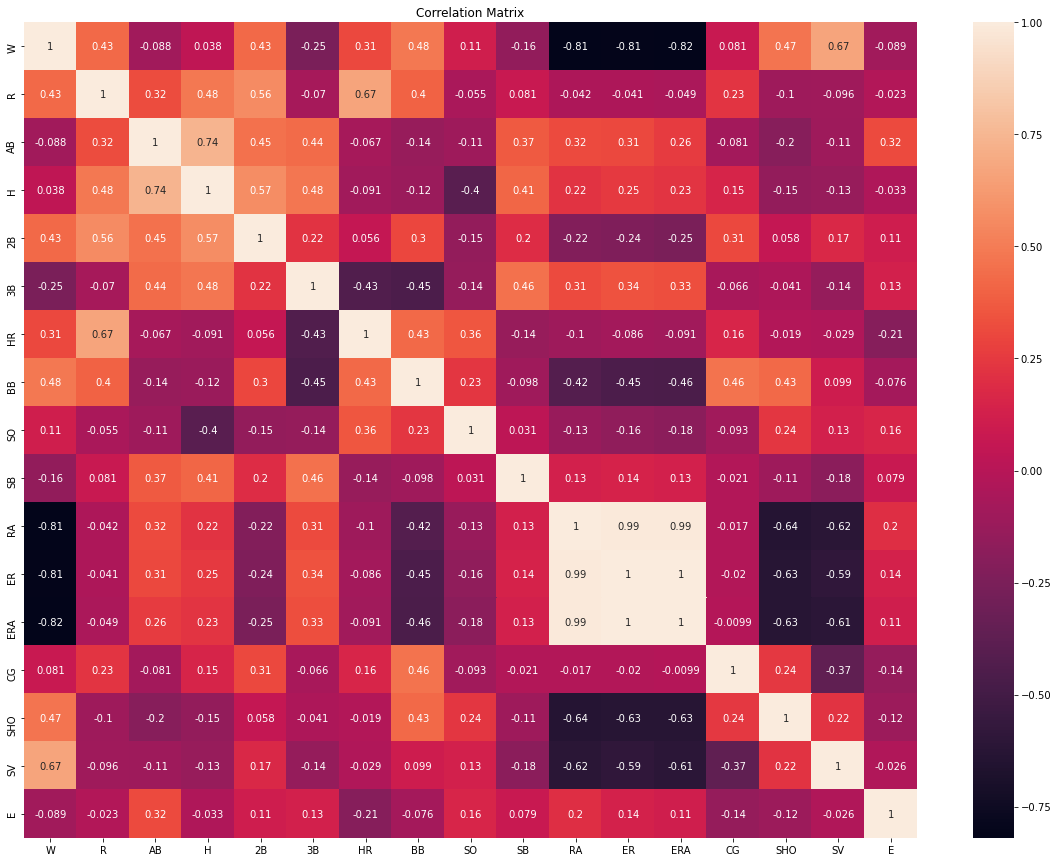

In [31]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

In this chart it is showing. it is lightly correlated with each other but RA,ER,ERA columns are highly correlated with each other. Also These columns are highly negatively correlated with Wins(W) columns that means there is high impact of these columns on wining. We are dropping two columns(er,ra) and keeping ERA from them because these have same kind of effect on wins, will not affect the prediction model. 

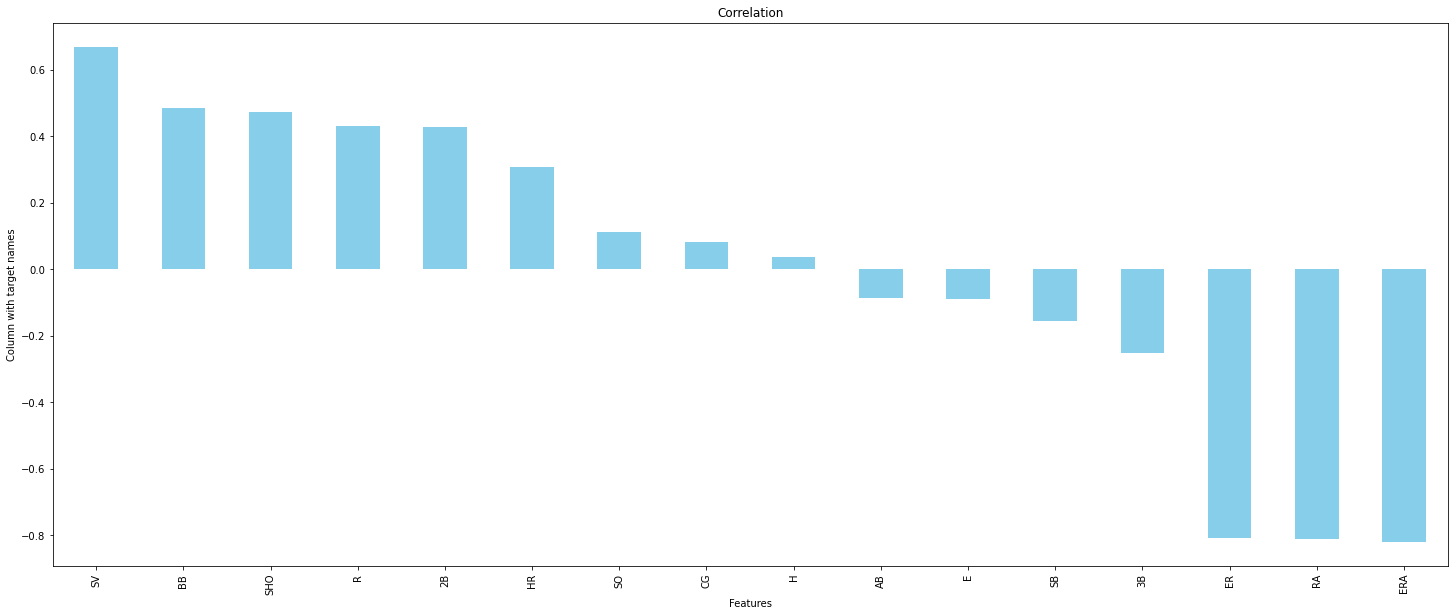

In [32]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

As we can see from the correlation matrix and the graph,ER,RA,ERA have the strongest correlation with wins but in negative nature.

In positive side SV has the highest correlation of 0.67 followed by BB,SHO,R,2B all above 0.4.

Even though ER,RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.

# Data Cleaning:

In [33]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

I can see there are no null values.

# Checking for Outliers:

<AxesSubplot:>

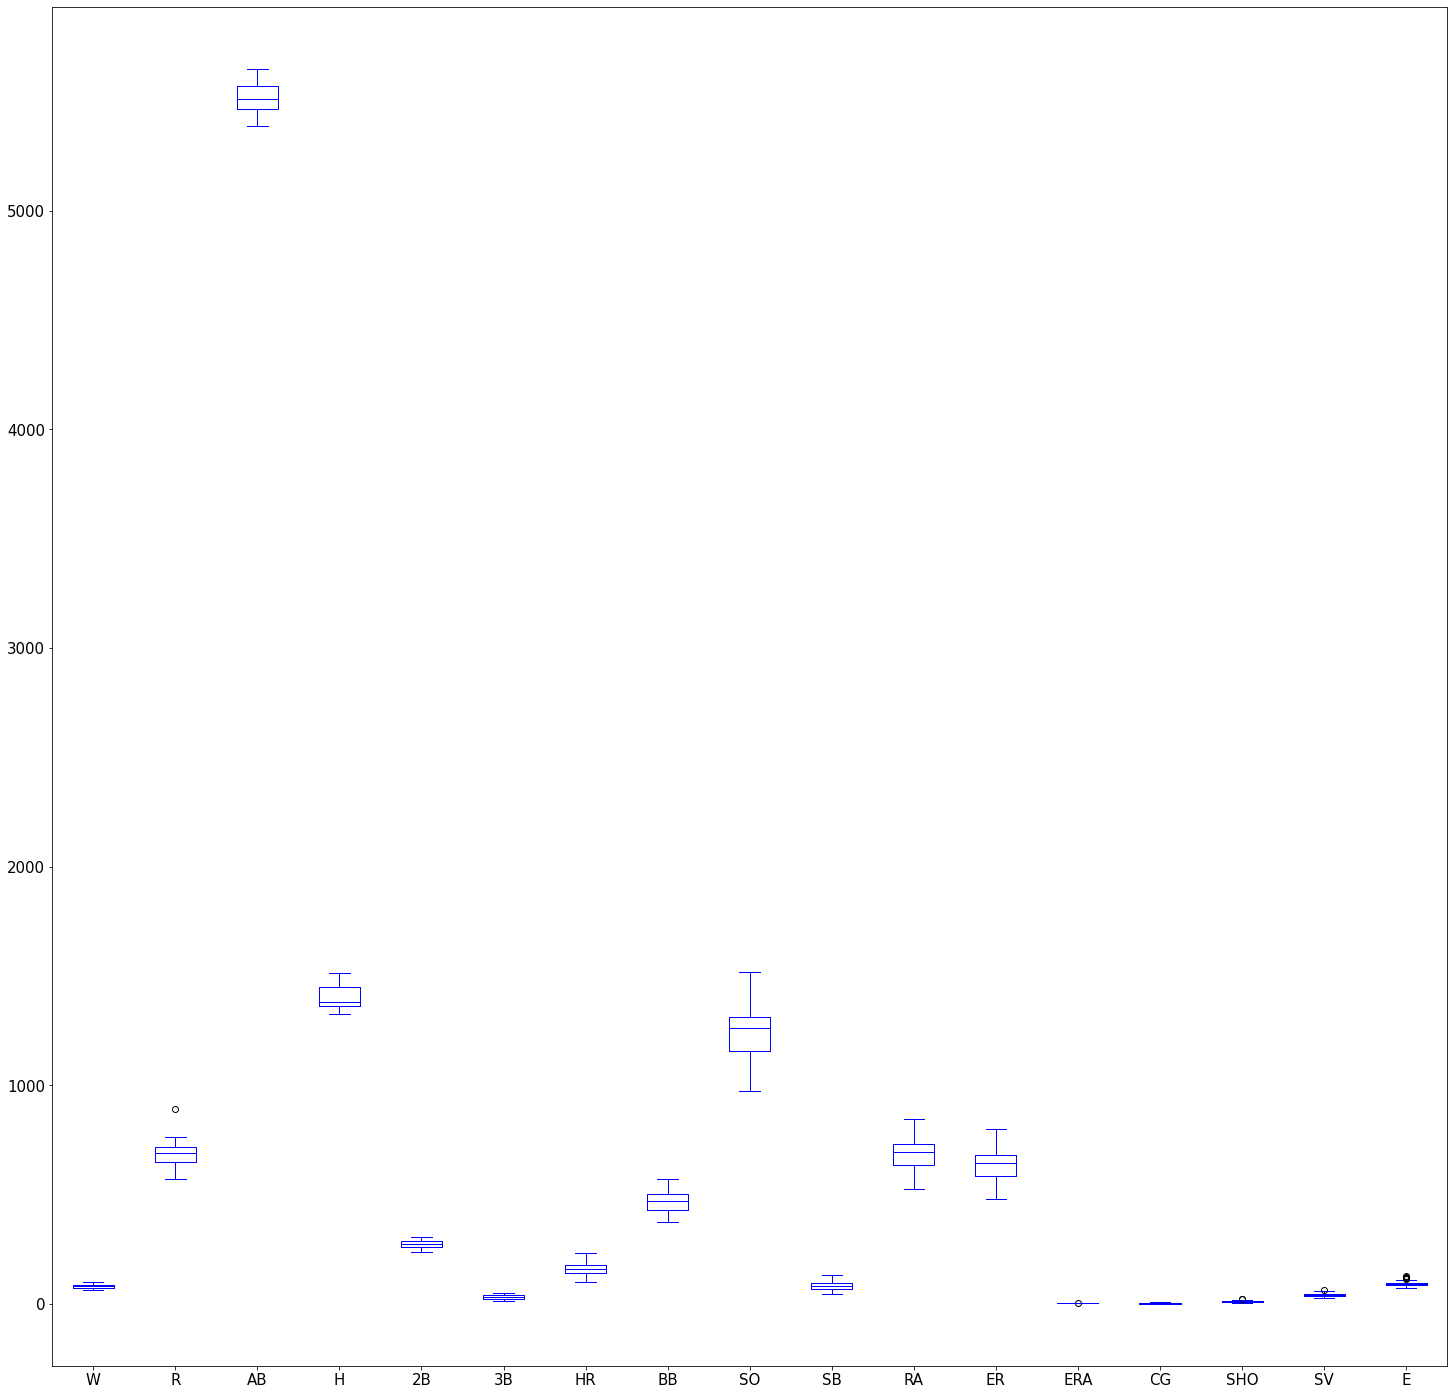

In [34]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='b')

By observing the box plot i can say that there are outliers are R-Runs,ERA-Earned Run average,SHO-Shutout,SV-Saves,E-Errors.

# Removing Outliers:

# Zscore method:

In [35]:
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


So,I have removed outliers by using Zscore.

In [37]:
#Checking shape of new dataset
df_new.shape

(29, 17)

    There are 29 rows and 17 columns of shape of new dataset after removing outliers.

In [38]:
#Checking shape of old dataset
df.shape

(30, 17)

There are 30 rows and 17 columns in old datase.

In [39]:
#Checking dataloss
Dataloss = (((30-29)/30)*100)

In [40]:
Dataloss

3.3333333333333335

So, I can see dataloss in zscore method after removing outliers of 3.33% which is less than 10%

# Checking for Skewness:

In [41]:
#Checking for Skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

I can see that there is skewness in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E).

# Removing Skewness:

In [42]:
#list of skewed features
skew_features=["H","CG","SHO","SV","E"]

In [43]:
#Removing skewness in H using log1p
df_new["H"]=np.log1p(df_new["H"])

In [44]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

I have removed the skewness in E by using yeo-johnson method.

In [45]:
    #Removing skewness using yeo-johnson
    df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

In [46]:
#Checking skewness after removing skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

After trying to remove skewness in H using yeo-johnson method i got 0.0 skewness.

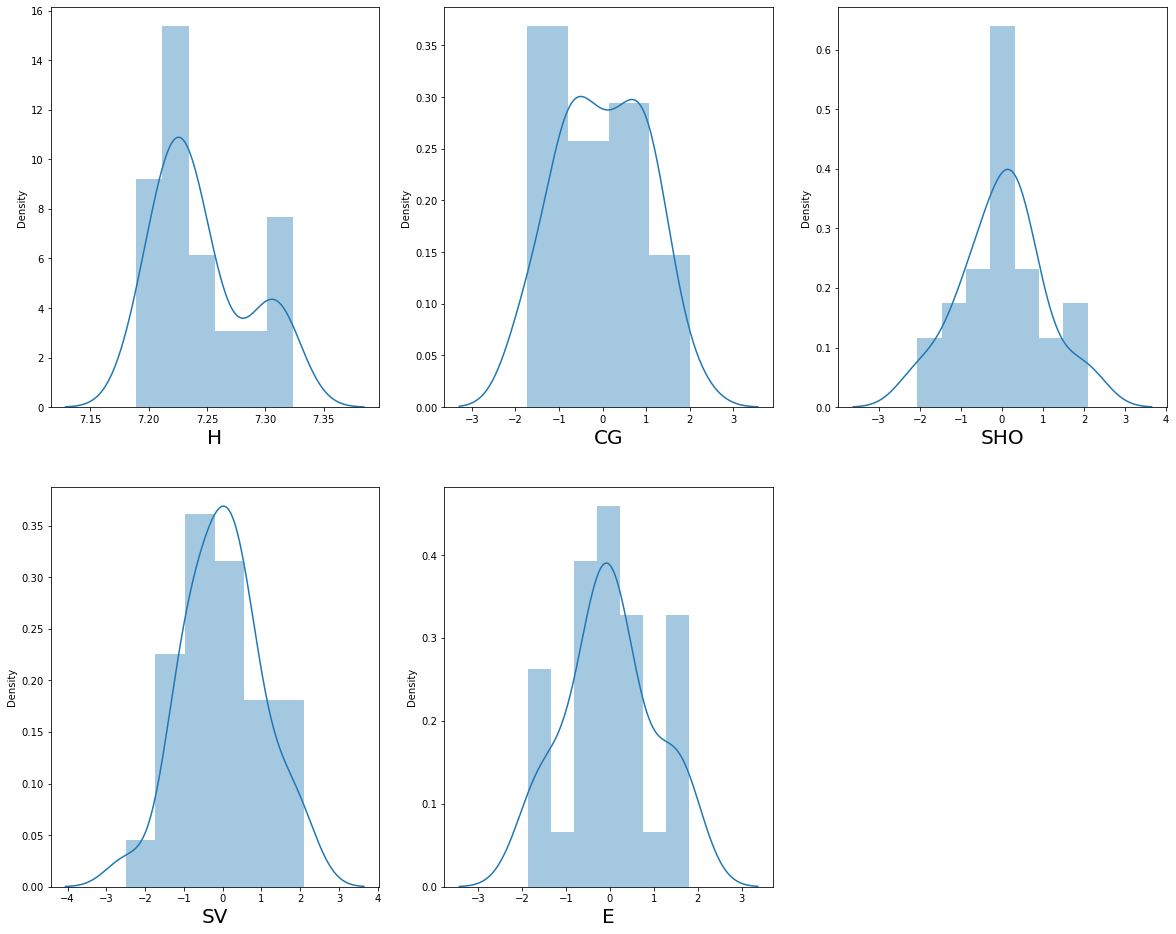

In [47]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

By seeing the plot i can say that skewness is removed.

# Splitting the columns:

In [48]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

x=Feature and y=Target

# Scaling Data using StandardScaler:

In [49]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [50]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [51]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


# Variance inflation factor:

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


VIF values i can say that multicolinearity exists in RA,ER,ERA. So let me drop RA and ER columns to avoid multicolinearity.

In [53]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [54]:
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,0.770649,-0.513555,0.312020,1.554265


I can see Dependent variables after removing multicolinearity.

In [55]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


Still VIF is high for 2 columns so let me drop ERA.

In [56]:
#Droping RA
X = X.drop(["ERA"],axis=1)

In [57]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.019438,R
1,5.210230,AB
2,7.728111,H
3,3.165732,2B
4,2.981242,3B
5,6.168639,HR
6,3.053363,BB
7,2.287734,SO
8,1.773119,SB
9,4.759240,RA


Multicolinearity issue is solved.

# Splitting the data for training and testing:

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Let find the best random state:

In [61]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768383015216393
At random state0, The test accuracy is :-0.49963681285927775


At random state1, The training accuracy is :-0.9762285427209911
At random state1, The test accuracy is :-0.18565756675520972


At random state2, The training accuracy is :-0.9638255316870868
At random state2, The test accuracy is :--0.2679901647388272


At random state3, The training accuracy is :-0.9677990948927815
At random state3, The test accuracy is :-0.6776697786661834


At random state4, The training accuracy is :-0.9680569379679669
At random state4, The test accuracy is :-0.7641316816583286


At random state5, The training accuracy is :-0.9612472010423034
At random state5, The test accuracy is :-0.6051495407609396


At random state6, The training accuracy is :-0.9723763056746941
At random state6, The test accuracy is :-0.7504731543294726


At random state7, The training accuracy is :-0.9610245315460946
At random state7, The test accuracy is :-0.31669541

I can see random state=99 giving highest accuracy,choosing that as random state.

In [62]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [63]:
x_train.shape

(22, 16)

In [64]:
y_train.shape

(22,)

In [65]:
x_test.shape

(7, 16)

In [66]:
y_test.shape

(7,)

# Model Building:

# Regression Algorithms:

In [68]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

# 1)Linear Regression:

In [69]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9633011594527375


In [70]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 27.077878720331576
MAE: 4.999072397573668
r2_score: 0.870272379874153


LR is giving me 88% r2_score.

# 2)SGD:

In [71]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -2.042267860265918e+30
mae: 2.7708156602138423e+32
mae: 1.6641490883524978e+16
rmse: 1.6645767210356638e+16


SGD is giving me 90% r2_score.

# 3)Lasso Regressor:

In [80]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [81]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8162585359689928
mse: 24.928841895472164
mae: 4.824282278813735
rmse: 4.992879118852384


Lasso is giving me 90%r2_score.

# 4)Ridge Regressor:

In [83]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [84]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8412293076862607
mse: 21.540970663300794
mae: 4.3822306255797026
rmse: 4.64122512525527


Ridge is giving 76%r2_score.

# Cross Validation:

In [88]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 33.227142, 22.206678
R   : 32.549049, 32.609656
svr   : 54.292689, 31.284378
svr_p   : 111.891643, 79.768934
svr_r   : 112.275451, 79.777668
RF   : 39.864027, 24.023091
DTR   : 70.216667, 45.490539
GBR   : 47.569624, 31.099844


According to all metrics score selecting the linearRegression as final model

# Hyper Parameter Tuning:

In [89]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [90]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [91]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [92]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [93]:
GVC.best_params_

{'alpha': 0.1,
 'fit_intercept': 'bool',
 'max_iter': 2,
 'selection': 'random',
 'tol': 1000}

I can see best parameters.

In [94]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 79.48387716584051
mean_squared_error: 27.83493563295762
mean_absolute_error: 4.3354552220416105
RMSE value: 5.275882450638719


After tuning i got 79.48% accuracy which is good.

# Saving the model:

In [95]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

I have saved my model using joblib.

# Predictions:

In [97]:
#Loading the saved model
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([69.58640733, 67.11525668, 85.45311838, 79.89227939, 85.81429738,
       88.93161129, 83.67532456])

These are predicted values

In [98]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6
Predicted,69.586407,67.115257,85.453118,79.892279,85.814297,88.931611,83.675325
Original,67.000000,63.000000,97.000000,76.000000,83.000000,92.000000,86.000000


Both original and predicted values are almost equal.

# COMPLETED THE BASEBALLCASE STUDY